# Imports

In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load Data

In [87]:
df = pd.read_csv(r"C:\Users\casey\OneDrive\Documents\Data_Science\pandas_exercises\data\Housing.csv")
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

# EDA

* Look for relvant columns
* Explore columns for missing values, values that don't make sense

Get rows and columns

In [4]:
print('There are ', df.shape[0], ' rows.')
print('There are ', df.shape[1], ' columns.')
print('Column Names: ', df.columns)
print('Column Types: ', df.dtypes)

There are  545  rows.
There are  13  columns.
Column Names:  Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Column Types:  price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


Check for any missing values in relevant columns

In [5]:
## CHECK FOR MISSING VALUES
df.info() # there are no missing values in the Sentiment or OriginalTweet columns which is what we care about

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Check relevant columns for values that don't make sense

In [8]:
print(df['mainroad'].value_counts())
print(df['guestroom'].value_counts())
print(df['basement'].value_counts())
print(df['hotwaterheating'].value_counts())
print(df['airconditioning'].value_counts())
print(df['prefarea'].value_counts())
print(df['furnishingstatus'].value_counts())


mainroad
yes    468
no      77
Name: count, dtype: int64
guestroom
no     448
yes     97
Name: count, dtype: int64
basement
no     354
yes    191
Name: count, dtype: int64
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
airconditioning
no     373
yes    172
Name: count, dtype: int64
prefarea
no     417
yes    128
Name: count, dtype: int64
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [9]:
df['price'].sort_values().unique()

array([ 1750000,  1767150,  1820000,  1855000,  1890000,  1960000,
        2100000,  2135000,  2233000,  2240000,  2275000,  2310000,
        2345000,  2380000,  2408000,  2450000,  2485000,  2520000,
        2590000,  2604000,  2653000,  2660000,  2695000,  2730000,
        2800000,  2835000,  2852500,  2870000,  2940000,  2961000,
        2975000,  3003000,  3010000,  3045000,  3080000,  3087000,
        3115000,  3118850,  3129000,  3143000,  3150000,  3220000,
        3234000,  3255000,  3290000,  3325000,  3332000,  3353000,
        3360000,  3395000,  3423000,  3430000,  3465000,  3493000,
        3500000,  3535000,  3570000,  3605000,  3633000,  3640000,
        3675000,  3703000,  3710000,  3745000,  3773000,  3780000,
        3815000,  3836000,  3850000,  3885000,  3920000,  3990000,
        4007500,  4025000,  4060000,  4095000,  4098500,  4123000,
        4130000,  4165000,  4193000,  4200000,  4235000,  4270000,
        4277000,  4305000,  4319000,  4340000,  4375000,  4382

In [10]:
df['area'].sort_values().unique()

array([ 1650,  1700,  1836,  1905,  1950,  2000,  2015,  2135,  2145,
        2160,  2175,  2176,  2275,  2325,  2398,  2400,  2430,  2475,
        2500,  2520,  2550,  2610,  2640,  2650,  2684,  2700,  2747,
        2787,  2800,  2817,  2835,  2850,  2856,  2870,  2880,  2910,
        2953,  2970,  2990,  3000,  3036,  3040,  3060,  3069,  3090,
        3100,  3120,  3150,  3162,  3180,  3185,  3210,  3240,  3264,
        3290,  3300,  3350,  3360,  3400,  3410,  3420,  3450,  3460,
        3480,  3500,  3510,  3512,  3520,  3540,  3570,  3584,  3600,
        3620,  3630,  3635,  3640,  3649,  3650,  3660,  3680,  3700,
        3720,  3745,  3750,  3760,  3780,  3792,  3800,  3816,  3840,
        3850,  3880,  3900,  3930,  3934,  3960,  3968,  3970,  3986,
        3990,  4000,  4032,  4040,  4046,  4050,  4075,  4079,  4080,
        4095,  4100,  4120,  4130,  4160,  4200,  4240,  4260,  4280,
        4300,  4320,  4340,  4350,  4352,  4360,  4370,  4400,  4410,
        4500,  4510,

In [14]:
print(df['bedrooms'].sort_values().unique())
print(df['bathrooms'].sort_values().unique())
print(df['stories'].sort_values().unique())
print(df['parking'].sort_values().unique())

[1 2 3 4 5 6]
[1 2 3 4]
[1 2 3 4]
[0 1 2 3]


# Pre-Processing

* One hot encode categorical variables
* Scale numeric features

In [88]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], dtype=int)
print(df_encoded)

        price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0    13300000  7420         4          2        3        2            0   
1    12250000  8960         4          4        4        3            0   
2    12250000  9960         3          2        2        2            0   
3    12215000  7500         4          2        2        3            0   
4    11410000  7420         4          1        2        2            0   
..        ...   ...       ...        ...      ...      ...          ...   
540   1820000  3000         2          1        1        2            0   
541   1767150  2400         3          1        1        0            1   
542   1750000  3620         2          1        1        0            0   
543   1750000  2910         3          1        1        0            1   
544   1750000  3850         3          1        2        0            0   

     mainroad_yes  guestroom_no  guestroom_yes  ...  basement_yes  \
0               1             

In [89]:
y = df['price']
X = df_encoded.iloc[:, 1:]

In [90]:
# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Step 4: Scale the numerical features NOT ALWAYS NECESSARY
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
# Step 5: Add a constant to the model (for the intercept)
# X_train_scaled = sm.add_constant(X_train_scaled)
# X_test_scaled = sm.add_constant(X_test_scaled)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit Initial Model

In [103]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     70.90
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           2.16e-97
Time:                        17:43:00   Log-Likelihood:                -6635.2
No. Observations:                 436   AIC:                         1.330e+04
Df Residuals:                     422   BIC:                         1.336e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            3.756e+05    6.5e+04      5.779      0.000    2.48e+05    5.03e+05
area                              235.9688     24.903      9.476      0.000     187.020     284.918
bedrooms                         7.678e+04   7.54e+04      1.018      0.309   -7.14e+04    2.25e+05
bathrooms                        1.094e+06   1.14e+05      9.564      0.000     8.7e+05    1.32e+06
stories                          4.075e+05   6.88e+04      5.919      0.000    2.72e+05    5.43e+05
parking                          2.248e+05   6.18e+04      3.639      0.000    1.03e+05    3.46e+05
mainroad_no                      3855.1306   8.55e+04      0.045      0.964   -1.64e+05    1.72e+05
mainroad_yes                     3.718e+05   7.71e+04      4.823      0.000     2.2e+05    5.23e+05
guestroom_no                     7.201e+04    7.1e+04      1.014      0.311   -6.76e+04    2.12e+05
guestroom_yes                    3.036e+05   8.34e+04      3.642      0.000     1.4e+05    4.68e+05
basement_no                     -7310.4837    6.9e+04     -0.106      0.916   -1.43e+05    1.28e+05
basement_yes                     3.829e+05   6.52e+04      5.870      0.000    2.55e+05    5.11e+05
hotwaterheating_no              -1.545e+05   1.02e+05     -1.517      0.130   -3.55e+05    4.57e+04
hotwaterheating_yes              5.301e+05   1.29e+05      4.114      0.000    2.77e+05    7.83e+05
airconditioning_no              -2.079e+05   5.63e+04     -3.695      0.000   -3.19e+05   -9.73e+04
airconditioning_yes              5.835e+05    7.6e+04      7.679      0.000    4.34e+05    7.33e+05
prefarea_no                     -1.271e+05   6.25e+04     -2.034      0.043    -2.5e+05   -4283.772
prefarea_yes                     5.028e+05   7.44e+04      6.761      0.000    3.57e+05    6.49e+05
furnishingstatus_furnished       3.054e+05   8.13e+04      3.757      0.000    1.46e+05    4.65e+05
furnishingstatus_semi-furnished  1.785e+05   6.82e+04      2.618      0.009    4.45e+04    3.13e+05
furnishingstatus_unfurnished    -1.083e+05   7.43e+04     -1.458      0.146   -2.54e+05    3.77e+04
==============================================================================
Omnibus:                       74.015   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.938
Skew:                           0.833   Prob(JB):                     2.10e-42
Kurtosis:                       5.791   Cond. No.                     1.11e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-30. This might indicate that there are
strong multicollinearity problems

In [102]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_test = model.predict(X_test)

# 1. Numerical Metrics
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred_test)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared: {r_squared:.4f}')

Mean Squared Error (MSE): 1754318687330.6711
Root Mean Squared Error (RMSE): 1324506.9601
R-squared: 0.6529


# OLS Conditions

Check on training set

In [100]:
# Step 1: Get residuals and predicted values
residuals = model.resid
y_pred_train = model.predict(X_train)

## Linearity

* What it Is: This assumes that there is a linear relationship between the predictors. For example, independent variables or features & the response variable.
* How to Detect It: If there is only one predictor, test with a scatter plot. Most cases aren’t so simple, so we’ll have to modify this by using a scatter plot to see our predicted values versus the actual values (in other words, view the residuals). Ideally, the points should lie on or around a diagonal line on the scatter plot.
* How to Fix It: Either adding polynomial terms to some of the predictors/applying nonlinear transformations. If those do not work, try adding additional variables to help capture the relationship between the predictors and the label.

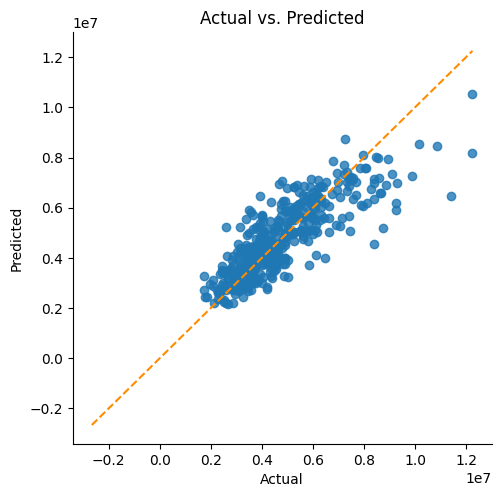

In [94]:
df_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train})
df_results['Residuals'] = residuals
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)
line_coords = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

## Independence (Autocorrelation)

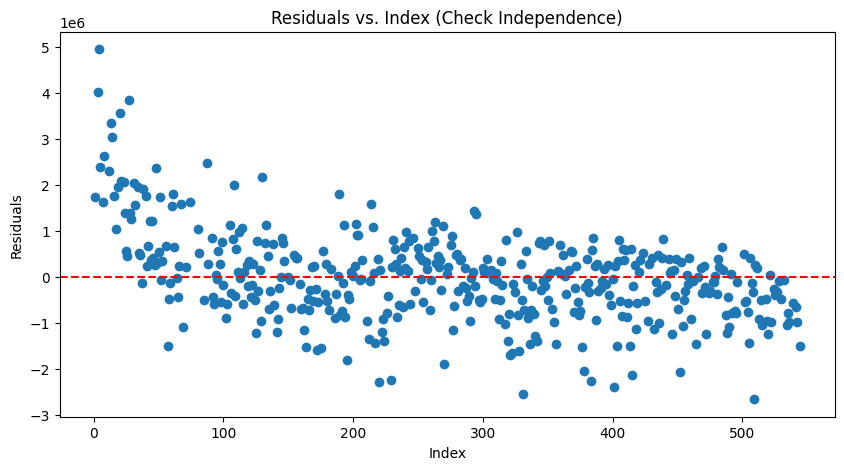

    lb_stat  lb_pvalue
1  1.279615   0.257971
The p-value is greater than or equal to the significance level 0.05. This suggests no evidence of autocorrelation.


In [95]:
# Step 4: Check Independence
# If your data is time series, plot residuals over time.
plt.figure(figsize=(10, 5))
plt.plot(residuals, marker='o', linestyle='None')
plt.title('Residuals vs. Index (Check Independence)')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
ljung_box_results = acorr_ljungbox(residuals, lags=[1], return_df=True)

# Print the results
print(ljung_box_results)

# Evaluate p-value
alpha = 0.05  # significance level
if ljung_box_results['lb_pvalue'].values[0] < alpha:
    print(f"The p-value is less than the significance level {alpha}. This suggests evidence of autocorrelation.")
else:
    print(f"The p-value is greater than or equal to the significance level {alpha}. This suggests no evidence of autocorrelation.")

## Homoscedasticity

* What it Is: More specifically, this assumes that the error terms of the model are homoscedastic (constant variance)
* Why it Happens: Our model may be giving too much weight to a subset of the data, particularly where the error variance was the largest.
* What it Affects: Significance tests for coefficients due to the standard errors being biased Additionally, the confidence intervals will be either too wide or too narrow.
* How to Detect It: Plot the residuals and see if the variance appears to be uniform. Cones are bad
* How to Fix It: Can be solved either by using weighted least squares regression instead of the standard OLS or by transforming either the dependent or highly skewed variables. Performing a log transformation on the dependent variable is not a bad place to start.

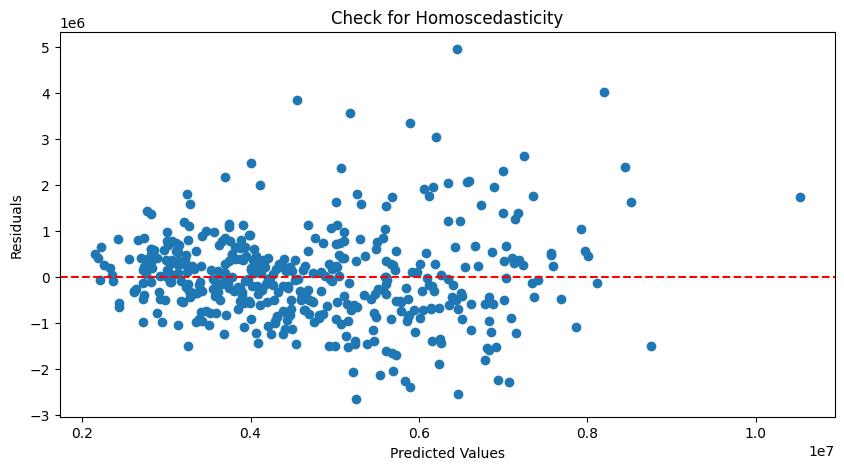

Breusch-Pagan Test Results:
Lagrange multiplier statistic: 58.925000584994436
p-value: 3.5418264016017146e-08
f-statistic: 5.508469863670299
f p-value: 9.190915939929767e-09
The p-value is less than the significance level 0.05. This suggests evidence of heteroscedasticity.


In [96]:
# Step 5: Check Homoscedasticity
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_train, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Check for Homoscedasticity')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Homoscedasticity Test (Breusch-Pagan test)
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, X_train_scaled)
bp_labels = ['Lagrange multiplier statistic', 'p-value', 'f-statistic', 'f p-value']

bp_results = dict(zip(bp_labels, bp_test))

# Print the results
print("Breusch-Pagan Test Results:")
for label, value in bp_results.items():
    print(f"{label}: {value}") # .4f}")

# Evaluate p-value
alpha = 0.05  # significance level
if bp_results['p-value'] < alpha:
    print(f"The p-value is less than the significance level {alpha}. This suggests evidence of heteroscedasticity.")
else:
    print(f"The p-value is greater than the significance level {alpha}. This suggests no evidence of heteroscedasticity.")

## Normality

* What it Is: More specifically, this assumes that the error terms of the model are normally distributed. 
* Why it Happens: This can actually happen if either the predictors or the label are significantly non-normal. Other potential reasons could include the linearity assumption being violated or outliers affecting our model.
* What it Affects: A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals.
* How to Detect It: We’ll look at both a histogram and the p-value from the Anderson-Darling test for normality.
* How to Fix It: square root/log transformations, removing outliers

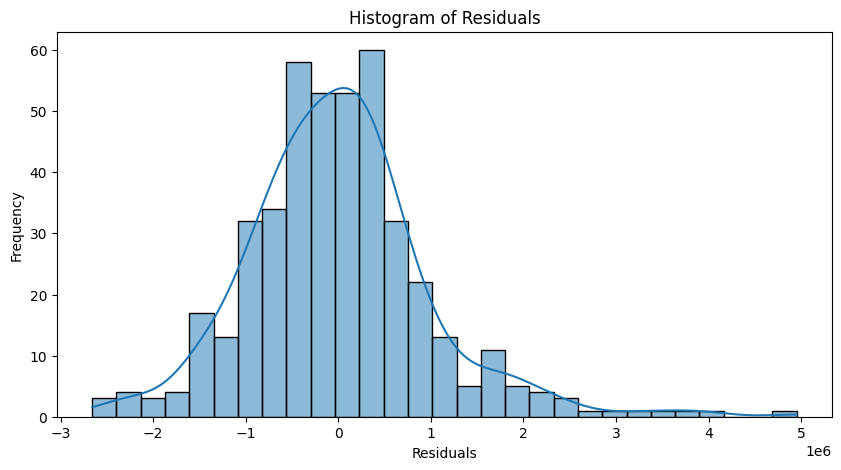

<Figure size 1000x500 with 0 Axes>

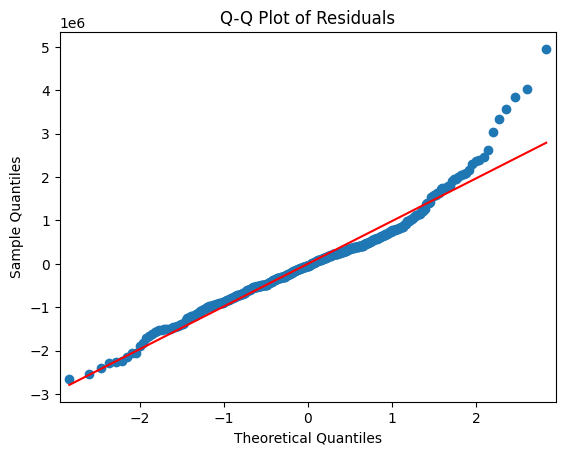

Shapiro-Wilk Test: Statistic=0.9557, p-value=3.62883415884169e-10
The p-value is less than the significance level 0.05. This suggests evidence of non-normality.


In [97]:
# Step 6: Check Normality of Residuals
# Histogram of Residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot for normality check
plt.figure(figsize=(10, 5))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Step 7: Statistical Tests
# Normality Test (Shapiro-Wilk test)
shapiro_test = stats.shapiro(residuals)

# Print the results
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue}') #:.4f}')

# Evaluate p-value
alpha = 0.05  # significance level
if shapiro_test.pvalue < alpha:
    print(f"The p-value is less than the significance level {alpha}. This suggests evidence of non-normality.")
else:
    print(f"The p-value is greater than the significance level {alpha}. This suggests evidence of normality.")

## Multicollinearity (Explanatory Variables)

* What it Is: This assumes that the predictors used in the regression are not correlated with each other.
* Why it Happens: A lot of data is just naturally correlated. For example, if trying to predict a house price with square footage, the number of bedrooms, and the number of bathrooms, we can expect to see a correlation between those three variables because bedrooms and bathrooms make up a portion of square footage.
* What it Affects: Multicollinearity causes issues with the interpretation of the coefficients.
Specifically, you can interpret a coefficient as “an increase of 1 in this predictor results in a change of (coefficient) in the response variable, holding all other predictors constant.”
This becomes problematic when multicollinearity is present because we can’t hold correlated predictors constant.
Additionally, it increases the standard error of the coefficients, which results in them potentially showing as statistically insignificant when they might actually be significant.
* How to Detect It: There are a few ways, but we will use a heatmap of the correlation as a visual aid and examine the variance inflation factor (VIF).
* How to Fix It: This can be fixed by other removing predictors with a high variance inflation factor (VIF) or performing dimensionality reduction.

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assume X_train_scaled is your scaled feature set
# Calculate VIF for each feature
vif_data = pd.DataFrame()
X_train_num = X_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
vif_data['Feature'] = X_train_num.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_num.values, i) for i in range(X_train_num.shape[1])]

# Print the VIF results
print(vif_data)

# Evaluate VIF values
high_vif_features = vif_data[vif_data['VIF'] > 5]  # Use 10 as an alternative threshold
if not high_vif_features.empty:
    print("Features with high multicollinearity:")
    print(high_vif_features)
else:
    print("No multicollinearity detected.")

     Feature        VIF
0       area   6.529808
1   bedrooms  14.033276
2  bathrooms   9.817913
3    stories   6.576309
4    parking   1.881434
Features with high multicollinearity:
     Feature        VIF
0       area   6.529808
1   bedrooms  14.033276
2  bathrooms   9.817913
3    stories   6.576309


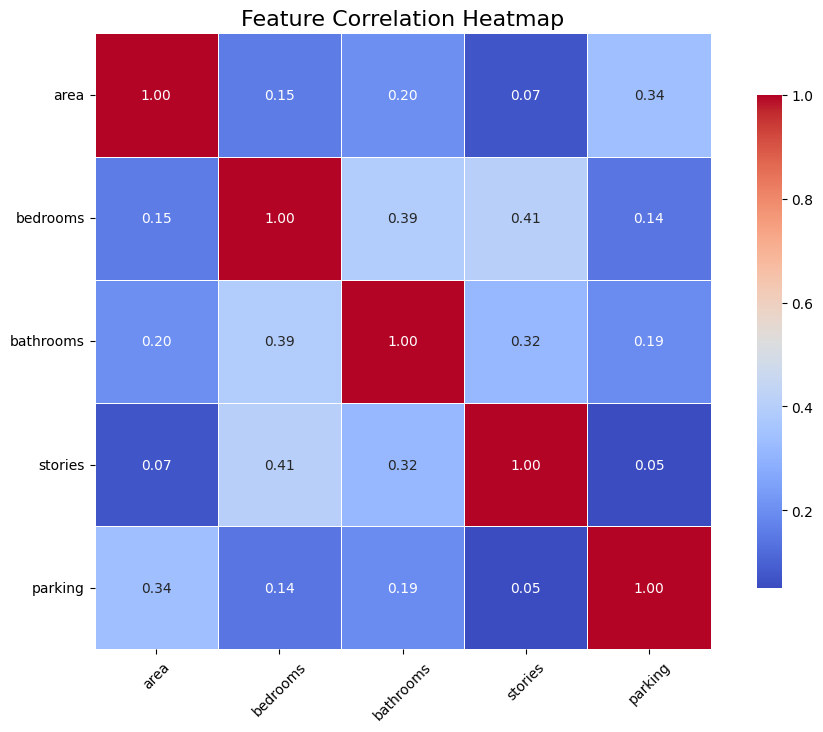

In [99]:
# Assume df is your original DataFrame with the independent variables
# Compute the correlation matrix
correlation_matrix = X_train_num.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

# Set titles and labels
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the heatmap
plt.show()